# An introduction to scaling and wavelet functions

We build our $k+1$ scaling functions $\{\phi_i\}_{i=0}^k$ from either [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) or [Interpolating Polynomials](https://en.wikipedia.org/wiki/Polynomial_interpolation).

Where the Legendre polynomials are defined as
\begin{align*}
        L_0(x) &= 1 \\
        L_1(x) &= x \\
        L_2(x) &= \frac{1}{2} \left( 3x^2 - 1\right)\\
        L_3(x) &= \frac{1}{2} \left( 5x^5 - 3x\right)  \\
        L_{j+1}(x) &= \frac{2j+1}{j+1} x L_j(x) - \frac{j}{j+1}L_{j-1}(x) 
\end{align*}

and they are orthonormal with the respect to the norm $L^2([-1, 1])$
\begin{align*}
    \int L_i(x) L_j(x) = \delta_{i, j}
\end{align*}

for (mostly) historical reasons do we define our basis on the interval $[0,1]$ so we shift
it and normalize it. So we define our Legendre scaling functions $\{\phi_i^L\}_{i=0}^k$ as 

\begin{align*}
    \phi_i^L  (x) = \sqrt{2j + 1}L_j(2x - 1), \qquad x \in [0, 1]
\end{align*}

An alternative to the Legendre Scaling functions are the Interpolating scaling functions $\{\phi_i^I\}_{i=0}^k$.
They are based upon the Legendre scaling functions and it's roots $\{x_j\}_{j=0}^k$ and weights $\{w_j\}_{j=0}^k$ of the [Gauss&ndash;Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature) of order $k+1$ and they are constructed as the linear combinations
\begin{align*}
\phi_j^I (x) = \sqrt{w_j} \sum_{i=0}^k \phi_i^L (x_j) \phi_i^L (x) && x \in [0, 1]  
\end{align*}

When you use VAMPyR you choose to either use the Legendre or Interpolating basis as the scaling
function, and in practice developers never need to touch the basis. But for educational purposes
it is possible to get access to the scaling functions in VAMPyR.

For that purpose let's plot the Legendre Functions

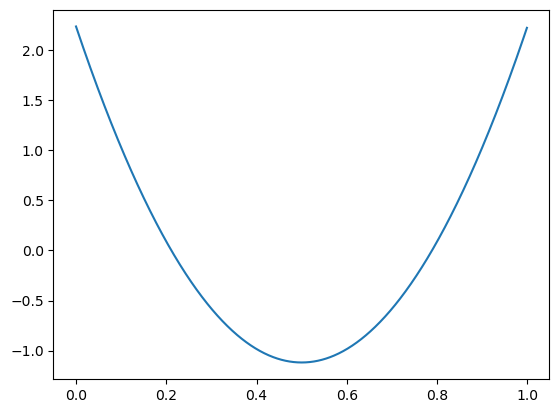

In [27]:
from vampyr import vampyr3d as vp
import numpy as np
import matplotlib.pyplot as plt

# Begin with import the LegendreBasis
# Note: Change the import to InterpolatingBasis if you want to do the
# same analysis using the InterpolatingBasis
from vampyr import LegendreBasis
k = 5
basis_set = LegendreBasis(order=k) # Set the highest polynomial order, k.
scaling = basis_set.scaling # Get the scaling basis

# Plot the scaling basis
x = np.arange(0.0, 1.0, 0.001)
y = [scaling(i=2)([_]) for _ in x] # Vary the order i up to k + 1
plt.plot(x, y)
plt.show()

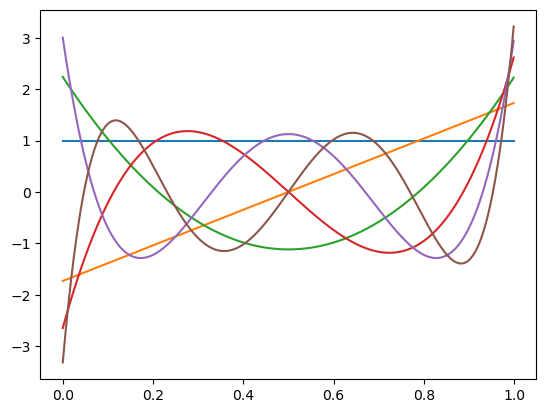

In [41]:
# Here we show multiple scaling functions in one figure

x = np.arange(0.0, 1.0, 0.001)
for i in range(k+1):
    y = [scaling(i=i)([_]) for _ in x]
    plt.plot(x, y)
plt.show()    

The scaling functions can also be compressed and dilated. These are defined as

\begin{align}
    \phi_{i, l}^n(x) &= 2^{n/2} \phi_i(2^nx - l)
\end{align}
here $i$ is the polynomial order, $n$ is the scale and $l$ is the translation index.

Below do we have an example of a scaling function plotted, play with the order of
the polynomial $i$, the scale $n$ and the translation index to see how it behaves.


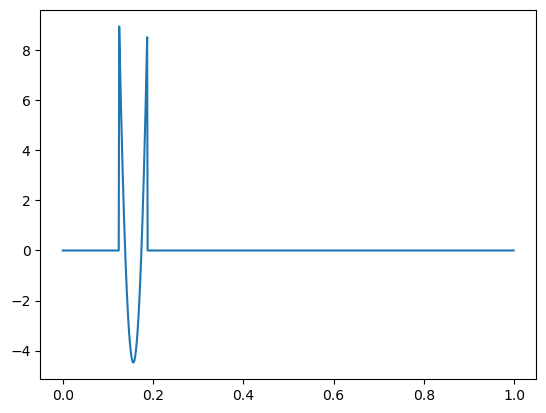

In [40]:
# Vary i, l and n to see how the function changes
x = np.arange(0.0, 1.0, 0.001)
y = [scaling(i=2, l=2, n=4)([_]) for _ in x]
plt.plot(x, y)
plt.show()

Next let's introduce our wavelet function $\psi_{i, l}^n$ are polynomials functions designed following Alperts [cite  me]
construction. They are connected to the scaling functions through the two-scale difference relation:
\begin{align}
\phi_i(x) = \sqrt{2} \sum_j h^{(0)}_{ij} \phi_j(2x) + h^{(1)}_{ij} \phi_j(2x-1) \\
\psi_i(x) = \sqrt{2} \sum_j g^{(0)}_{ij} \phi_j(2x) + g^{(1)}_{ij} \phi_j(2x-1) \\
\end{align}
where $h^{(0)}_{ij}, h^{(1)}_{ij}$ and $h^{(0)}_{ij}, h^{(1)}_{ij}$ and $g^{(0)}_{ij}, g^{(1)}_{ij}$
are components of the filter matrices $H^{(0)}, H^{(1)}, G^{(0)}$ and $G^{(1)}$.
In the following do we have the same figures as above only for the wavelet functions.

Properties to note is the symmetric/asymmetric nature by varying $i$, also note that the
wavelet functions change depending on the number of scaling/wavelet functions $k+1$. And that
they stay the same if we change between Legendre and Interpolating polynomials. The reason for the
latter is that the wavelets are the same, what changes are the filter matrices. 


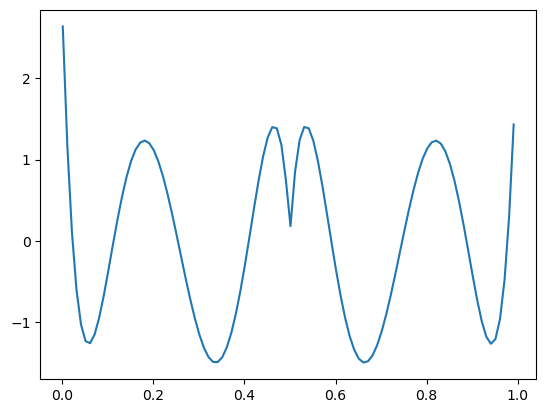

In [37]:
wavelet = basis_set.wavelet

# Plot the scaling basis
x = np.arange(0.001, 1.0, 0.01)
y = [wavelet(i=2)([_]) for _ in x] # Vary the order i up to k + 1
plt.plot(x, y)
plt.show()

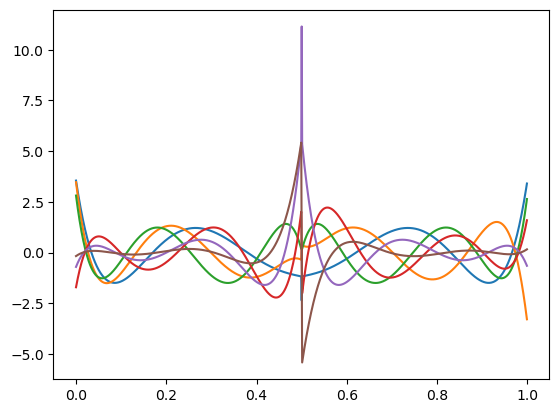

In [38]:
# Here we show multiple wavelet functions in one figure

x = np.arange(0.0, 1.0, 0.001)
for i in range(k+1):
    y = [wavelet(i=i, n=0)([_]) for _ in x]
    plt.plot(x, y)
plt.show()

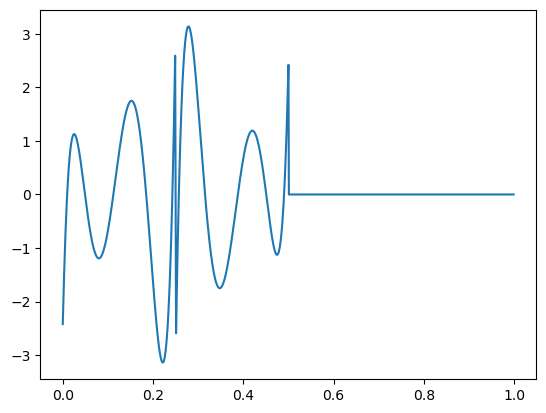

In [42]:
x = np.arange(0.0, 1.0, 0.001)
y = [wavelet(i=3, l=0, n=1)([_]) for _ in x]
plt.plot(x, y)
plt.show()

# Scaling Projectors


Let's introduce the Scaling Projectior $P^n_k$. This operator projects the function $f$ onto the
scaling basis $\{\phi_{j,l}^n\}$. I.e.,

\begin{align}
f^n(x) = P^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k s_{j, l}^{n,f} \phi_{j,l}^n(x) 
\end{align}


Let's use it and plot some functions

We begin with making an analytical gaussian function

In [10]:
from vampyr import vampyr3d as vp

r0 = [0.8, 0.8, 0.8]
beta = 100.0 # Do 100 and 1000000
alpha = (beta / np.pi) ** (3 / 2.0)
f = vp.GaussFunc(alpha=alpha, beta=beta, position=r0)

# PS: They will show a better way to do analytical functions during the exercises.

In [11]:
mra = vp.MultiResolutionAnalysis(box=[0, 2], order=5)

P0 = vp.ScalingProjector(mra, 0) # P^0_k
P1 = vp.ScalingProjector(mra, 1) # P^1_k
P2 = vp.ScalingProjector(mra, 2) # P^2_k
P3 = vp.ScalingProjector(mra, 3) # P^3_k
P4 = vp.ScalingProjector(mra, 4) # P^4_k

f0 = P0(f) #f^0 = P^0_k[f]
f1 = P1(f) #f^1 = P^1_k[f]
f2 = P2(f) #f^2 = P^2_k[f]
f3 = P3(f) #f^3 = P^3_k[f]
f4 = P4(f) #f^4 = P^4_k[f]

Next let's show you what the basis we project onto looks like

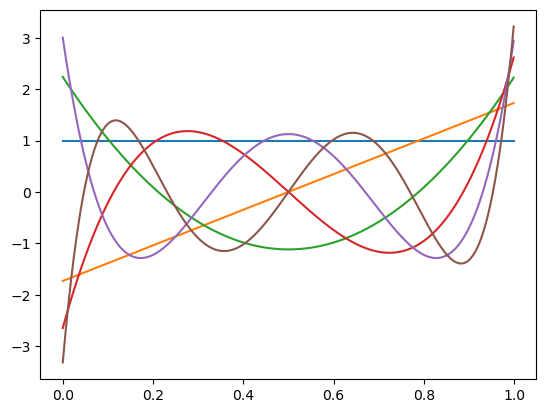

In [12]:
n = 0
x = np.arange(0.0, 1.0, 0.001)
for l in range(2**n):
    for i in range(6):
        y = [scaling(i=i, l=l, n=n)([x]) for x in x]
        plt.plot(x, y)

In [ ]:
from plot_diff import plot_f_fn

plot_f_fn(0, f, f0, alpha*1.1)

In [ ]:
plot_f_fn(1, f, f1, alpha*1.1)

In [ ]:
plot_f_fn(2, f, f2, alpha*1.1)

# Wavelet Projectors


Next let's introduce the Wavelet Projector $Q^n_k$. This operator projects the function $f$ onto the
wavelet basis $\{\psi_{j,l}^n\}$. I.e.,

\begin{align}
df^n(x) = Q^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k w_{j, l}^{n,f} \psi_{j,l}^n(x) 
\end{align}


The Wavelet Projector $Q^n_k$ is related to the Scaling Projector $P^n_k$ through the relation 

\begin{align}
P^{n+1}_k = P^n_k + Q^n_k
\end{align}

This leads to the following relation

\begin{align}
P^{n+1}_k = P^0_k + Q^n_k + Q^{n-1}_k +... + Q^0_k
\end{align}


Which means we can write the function projection $f^N$ as 


\begin{align}
f^N(x) = P^0_k [f(x)] + \sum_{n=0}^N Q^n_k [f(x)]
\end{align}


In [ ]:
Q0 = vp.WaveletProjector(mra, 0) # Q^0_k
Q1 = vp.WaveletProjector(mra, 1) # Q^1_k
Q2 = vp.WaveletProjector(mra, 2) # Q^2_k
Q3 = vp.WaveletProjector(mra, 3) # Q^3_k
Q4 = vp.WaveletProjector(mra, 4) # Q^4_k

df0 = Q0(f) #df^0 = Q^0_k[f]
df1 = Q1(f) #df^0 = Q^0_k[f]
df2 = Q2(f) #df^0 = Q^0_k[f]
df3 = Q3(f) #df^0 = Q^0_k[f]
df4 = Q4(f) #df^0 = Q^0_k[f]

In [ ]:
from plot_diff import plot_fn_df
plot_fn_df(0, f0, df0, alpha)

In [ ]:
plot_fn_df(1, f1, df1, alpha)

In [ ]:
plot_fn_df(2, f2, df2, alpha)

Next, we can try to look at some Adaptivity. Luca mentioned that we have very good error control,
this can be employed to drastically reduce the work we need to do on our functions, while at the same time have high precision

This is what happens when we apply adaptivity to our projector

In [ ]:
r0 = [0.8, 0.8, 0.8]
beta = 500.0 # Do 500 then compare with P4
alpha = (beta / np.pi) ** (3 / 2.0)
f = vp.GaussFunc(coef=alpha, exp=beta, pos=r0)

P_eps = vp.ScalingProjector(mra, prec=1.0e-3)
P2 = vp.ScalingProjector(mra, 2)
P4 = vp.ScalingProjector(mra, 4)
f_eps = P_eps(f)
f2 = P2(f)
f4 = P4(f)

x = np.arange(0.0, 2.0, 0.001)
y = [f2([x, 0.8, 0.8]) for x in x]
plt.plot(x, y)

In [ ]:
print(f2)

In [ ]:
print(f_eps)

In [ ]:
from grid_plotter import grid_plotter

# Uniform grid (DO f2 not f4, you'll blow up your laptop)
grid_plotter(f2)

In [ ]:
grid_plotter(f_eps)